This script is used to run a language detector on all video titles and export the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import pickle, feather
from multiprocessing import Pool
import seaborn as sns

In [2]:
grouped = pickle.load(open("./grouped_sample_larger.pkl", "rb"))

In [3]:
grouped.head()

,video_id,duration,title,channel_id,channel_title,published_at,views,likes,dislikes,comments,...,1,2,3,4,5,6,7,8,9,10
0,--DwgB78t-c,00:02:36,Fruto Dulce - Geraldine Rojas & Ezequiel Paludi 3,UCdzU3DSGzyWzN2118yd9X9g,Abdullah AYDIN,2012-01-19 18:20:02,1671,10,1,0,...,0,1,0,0,0,0,0,0,0,0
1,--NZRkXBV7k,00:04:53,Carlos Santana presents Cindy Blackman in Mexi...,UC0UnhAG47DRyVZGVcbhAXhQ,Saul TP,2015-03-30 04:04:40,9994,41,3,2,...,0,1,0,0,0,0,0,0,0,0
2,--hoQ2sGG4M,00:04:35,"Taoist monk Tian Xin Shan in Brazil,Wudang San...",UCXjtAvK5P3wXBGh0vbGylzg,TheTVtaoista,2009-08-07 06:36:33,3407,8,1,2,...,0,0,0,0,0,0,0,0,0,0
3,--sBoaqBlzA,00:08:19,"MAKEUP FOR GUYS: Actors, TV Hosts, On Camera ...",UCeKHMeUlcLNPLCLUfZUQI2w,Tiffany Hendra,2011-08-04 00:47:49,15816,120,2,8,...,0,1,0,1,0,0,0,0,0,0
4,--7h1S4neDM,00:03:19,Pet Rescue Saga Level 539 2 Stars No Boosts,UCNWPDyaWf2eAHnofFLSnEMg,All Gamers,2014-04-29 15:44:44,2167,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
def detect_process_na(s):
    try:
        return detect(s)
    except:
        return "none"

In [5]:
p = Pool(8)
langs = list(p.imap(detect_process_na, grouped['title']))
p.close()

In [7]:
len(langs)

1013863

In [8]:
pd.DataFrame({'title': grouped['title'], 'lang': langs}).head(100)

,lang,title
0,ro,Fruto Dulce - Geraldine Rojas & Ezequiel Paludi 3
1,en,Carlos Santana presents Cindy Blackman in Mexi...
2,en,"Taoist monk Tian Xin Shan in Brazil,Wudang San..."
3,en,"MAKEUP FOR GUYS: Actors, TV Hosts, On Camera ..."
4,en,Pet Rescue Saga Level 539 2 Stars No Boosts
5,de,Samsung EZON DS10 Installation Video
6,nl,McDonald's Beef
7,en,Concealed the Conclusion - Stage 2C Theme: Wes...
8,en,GRFS Goblin Gun Set Up and Review!
9,en,"How to get free money, diamonds in Hayday game..."


In [9]:
grouped['lang'] = langs

In [10]:
pickle.dump(grouped, open("grouped_w_lang", "wb"))

In [5]:
grouped = pickle.load(open("./grouped_w_lang.pkl", "rb"))

In [6]:
grouped.columns

Index(['video_id', 'duration', 'title', 'channel_id', 'channel_title',
       'published_at', 'views', 'likes', 'dislikes', 'comments', 'labels', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'lang'],
      dtype='object')

In [7]:
grouped.groupby('lang').size().sort_values(ascending=False).head(20)

lang
en    485634
de     70128
es     62916
pt     44406
ja     33533
it     30407
ru     27600
fr     24619
id     19922
ko     18188
ca     16156
nl     14006
pl     13256
ar     12405
tl     11758
ro     10310
vi      9338
af      8806
no      8126
tr      7977
dtype: int64

In [9]:
col = {'all': grouped.groupby('lang').size()}
for i in range(11):
    col[i] = grouped.loc[grouped[str(i)] == 1, :].groupby('lang').size()

In [12]:
res = pd.DataFrame(col).fillna(0)

In [14]:
feather.write_dataframe(res, "by_cluster_by_lang.feather")
# res = feather.read_dataframe("./by_cluster_by_lang.feather")

In [17]:
res.head()

,0,1,2,3,4,5,6,7,8,9,10,all
af,1610.0,590.0,2494.0,1428.0,1405.0,507.0,1318.0,328.0,378.0,153.0,77.0,8806
ar,2511.0,228.0,2650.0,1384.0,1365.0,2520.0,934.0,747.0,629.0,173.0,52.0,12405
bg,1296.0,306.0,1784.0,1171.0,833.0,294.0,574.0,229.0,356.0,96.0,66.0,5957
bn,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
ca,3116.0,666.0,6368.0,2328.0,1819.0,1273.0,1480.0,433.0,494.0,356.0,120.0,16156


In [13]:
temp = res.sort_values('all', ascending=False).head(10).stack().reset_index()
temp.columns = ['lang', 'cls', 'val']
temp.head()

,lang,cls,val
0,en,0,110282.0
1,en,1,24205.0
2,en,2,174999.0
3,en,3,64146.0
4,en,4,67972.0


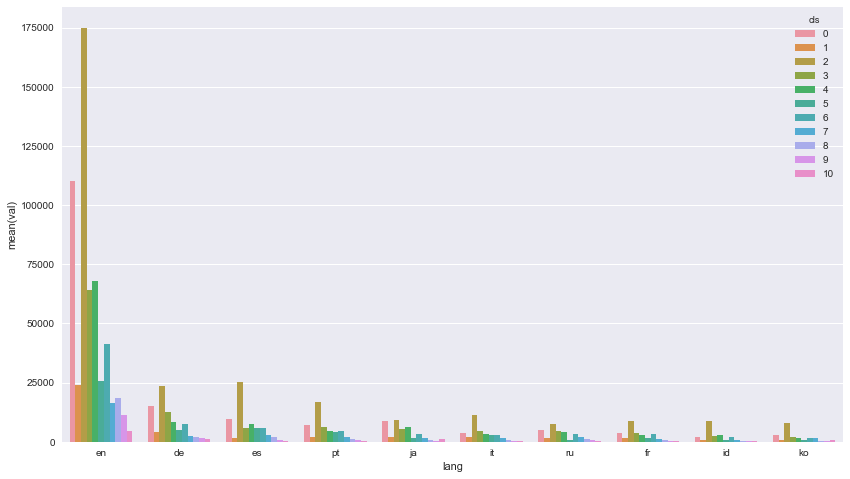

In [18]:
sns.set(rc={"figure.figsize": (14, 8)})
sns.barplot(x="lang", y="val", hue="cls", data=temp.loc[temp['cls'] != 'all', :])

In [20]:
res.head().reset_index()

,index,0,1,2,3,4,5,6,7,8,9,10,all
0,af,1610.0,590.0,2494.0,1428.0,1405.0,507.0,1318.0,328.0,378.0,153.0,77.0,8806
1,ar,2511.0,228.0,2650.0,1384.0,1365.0,2520.0,934.0,747.0,629.0,173.0,52.0,12405
2,bg,1296.0,306.0,1784.0,1171.0,833.0,294.0,574.0,229.0,356.0,96.0,66.0,5957
3,bn,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
4,ca,3116.0,666.0,6368.0,2328.0,1819.0,1273.0,1480.0,433.0,494.0,356.0,120.0,16156


In [21]:
res.reset_index().to_json("./stats/lang.json", orient="records")